In [653]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import load_digits


In [654]:
x,y = load_digits(return_X_y=True)
y = y.reshape(-1,1)
x.shape,y.shape

((1797, 64), (1797, 1))

In [655]:

X_random = np.random.randint(0, 16, (180, 64))
Y_random = np.full((180,1),10)
X_random.shape,Y_random.shape


((180, 64), (180, 1))

In [656]:
x = np.concatenate([x, X_random], axis=0) 
y = np.concatenate([y, Y_random], axis=0)  
x.shape,y.shape

((1977, 64), (1977, 1))

In [657]:
data = load_digits(as_frame=True)
df = data.frame 

In [658]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [659]:
model = LogisticRegression(solver='liblinear',max_iter=100000 ,C=0.3)
model.fit(X_train,y_train.reshape(-1))

LogisticRegression(C=0.3, max_iter=100000, solver='liblinear')

In [660]:
model.score(X_train,y_train)

0.9962049335863378

In [661]:
model.score(X_test,y_test)

0.9444444444444444

In [662]:
p = model.predict(X_test)
p[1]

np.int64(5)

In [663]:
p = model.predict_proba(X_test)
p

array([[2.38264497e-07, 1.22130258e-05, 1.24398891e-09, ...,
        7.74860493e-02, 9.22172259e-01, 5.99610785e-06],
       [2.30594571e-10, 1.13519735e-09, 8.39073589e-14, ...,
        7.14645212e-08, 2.87929378e-07, 4.97905005e-05],
       [4.00965227e-14, 8.95685646e-01, 2.27726480e-02, ...,
        2.72533815e-03, 1.58094662e-09, 4.08662651e-06],
       ...,
       [8.28260292e-06, 1.59594409e-07, 7.30311252e-05, ...,
        3.44416840e-02, 6.13711496e-17, 6.24815431e-05],
       [1.08177077e-06, 6.85033177e-07, 3.55509113e-08, ...,
        4.95521642e-07, 1.75059349e-01, 3.33480220e-05],
       [1.03834929e-10, 7.25059697e-07, 9.99983017e-01, ...,
        6.44675097e-06, 4.28854191e-08, 9.65996032e-06]], shape=(396, 11))

In [664]:
def pre(x_item):
    p = model.predict_proba(x_item)
    index_of_not_detection=[]
    for idx,i in enumerate(p):
        index = i[i.argmax()]
        if index>0.50:
            print(i.argmax()) 
        else :            
            index_of_not_detection.append(idx)
            # print(10)
    return index_of_not_detection

In [680]:
v = np.random.randint(0,17,64).reshape(1, -1)
pre(v)

10


[]

In [666]:
index_of_not_detection = pre(X_test)

9
5
1
8
5
8
2
0
10
7
4
7
4
3
1
4
10
1
2
6
3
2
5
1
2
7
5
5
6
3
3
4
10
3
4
3
7
9
7
8
4
7
10
8
2
9
5
0
2
5
7
8
2
7
0
10
7
8
6
10
7
7
0
3
10
5
7
0
3
1
2
5
1
0
7
10
0
1
6
9
2
9
5
5
0
5
2
9
1
10
3
1
9
5
7
8
10
4
2
3
9
1
5
0
9
2
4
10
0
7
9
10
5
9
9
9
3
7
3
10
1
6
3
10
7
1
1
7
6
0
0
6
8
2
8
0
8
6
4
2
7
2
1
8
5
10
6
9
2
8
10
0
2
2
7
1
8
7
6
9
5
3
7
4
3
6
5
4
1
5
1
1
10
3
9
10
5
10
4
2
1
5
10
3
7
4
2
8
1
10
9
3
1
9
0
9
7
1
9
3
7
5
8
6
9
9
1
0
7
6
10
2
1
9
7
7
10
5
7
6
6
9
10
6
2
9
1
3
3
7
3
9
7
1
7
9
4
10
1
5
7
1
9
0
0
10
6
2
8
3
9
10
6
6
9
1
6
6
1
7
6
5
7
4
2
2
6
8
1
9
7
0
1
5
9
3
10
0
4
10
5
5
10
5
5
1
4
8
8
4
4
5
0
1
2
4
5
2
1
1
1
8
5
8
1
0
9
9
4
4
5
6
10
4
3
4
6
7
8
6
2
8
8
0
0
6
2
10
7
2
7
0
3
3
2
9
5
4
1
10
9
10
7
2
6
8
6
5
4
7
1
1
4
4
5
3
6
8
3
2
5
6
8
1
10
3
1
8
0
6
5
9
9
9
8
7
5
0
1
6
6
0
4
7
9
7
10
7
6
5
2


In [667]:
len(index_of_not_detection)

5

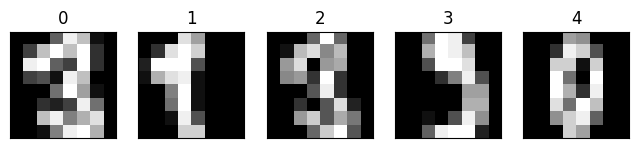

In [668]:
plt.figure(figsize=(8,8))

for idx,item in enumerate(X_test[index_of_not_detection]):
    plt.subplot(5,5,idx+1)
    plt.xticks([])
    plt.yticks([])
    plt.title(idx)
    plt.imshow(item.reshape(8,8),'gray')
